<font size="5.8">Summary</font>  

Convolutional neural networks, also known as convnets or CNN, is a type of deep-learning model almost universally used in computer vision applications. CNN are distinguished from other neural networks by their superior performance with image, speech, or audio signal inputs. CNNs are made up of neurons that have learnable weights and biases. Each neuron receives some inputs, performs a dot product and optionally follows it with a non-linearity. The whole network still expresses a single differentiable score function: from the raw image pixels on one end to class scores at the other. And they still have a loss function on the last (fully-connected) layer and all the tips/tricks we developed for learning regular Neural Networks still apply. This notebook focuses on the basic concepts of CNN with examples and their application for image processing task.


Python functions and data files needed to run this notebook are available via this [link](https://github.com/MehdiRezvandehy/Convolutional_Neural_Network.git).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import gridspec
from sklearn.datasets import load_sample_image
from IPython.display import HTML
import tensorflow as tf
from tensorflow import keras
from functools import partial
import os, shutil

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Convolution" data-toc-modified-id="Convolution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Convolution</a></span><ul class="toc-item"><li><span><a href="#One-dimensional" data-toc-modified-id="One-dimensional-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>One-dimensional</a></span></li><li><span><a href="#Two-dimensional" data-toc-modified-id="Two-dimensional-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Two-dimensional</a></span></li></ul></li><li><span><a href="#Understanding-of-Padding-and-Strides" data-toc-modified-id="Understanding-of-Padding-and-Strides-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Understanding of Padding and Strides</a></span></li><li><span><a href="#Stacking-Multiple-Feature-Maps" data-toc-modified-id="Stacking-Multiple-Feature-Maps-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Stacking Multiple Feature Maps</a></span></li><li><span><a href="#Simple-Tensorflow-Implementation" data-toc-modified-id="Simple-Tensorflow-Implementation-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Simple Tensorflow Implementation</a></span></li><li><span><a href="#Pooling-Layer" data-toc-modified-id="Pooling-Layer-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pooling Layer</a></span></li><li><span><a href="#Architectures-of-CNN" data-toc-modified-id="Architectures-of-CNN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Architectures of CNN</a></span></li><li><span><a href="#Train-CNN-from-Scratch-(Cat-and-Dog-Images)" data-toc-modified-id="Train-CNN-from-Scratch-(Cat-and-Dog-Images)-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Train CNN from Scratch (Cat and Dog Images)</a></span><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Implement-CNN" data-toc-modified-id="Implement-CNN-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Implement CNN</a></span></li><li><span><a href="#Data-Augmentation" data-toc-modified-id="Data-Augmentation-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Data Augmentation</a></span><ul class="toc-item"><li><span><a href="#Implement-a-new-CNN-with-Augmentation" data-toc-modified-id="Implement-a-new-CNN-with-Augmentation-8.3.1"><span class="toc-item-num">8.3.1&nbsp;&nbsp;</span>Implement a new CNN with Augmentation</a></span></li></ul></li></ul></li><li><span><a href="#Pretrained-Model" data-toc-modified-id="Pretrained-Model-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Pretrained Model</a></span></li></ul></div>

# Introduction

A convolutional neural network (CNN or ConvNet) is a network architecture for deep learning that learns directly from data. CNNs emerged from the study of the brain’s visual cortex, and they have been used in image recognition since the 1980s. Due to the increase in computational power in last years, the amount of available training data, CNNs have achieved superhuman performance on some complex visual tasks for example image search services, self-driving cars, automatic video classification systems and so forth. Moreover, CNNs are not only limited to visual perception: they are also successful for voice recognition or natural language processing (NLP).

The fundamental difference between a densely connected layer and a convolution layer is this: **Dense layers learn global patterns** in their input feature space (for example, patterns involving all pixels in figure below), whereas **local patterns** are learned by **convolution layers.** For image below, local patterns are edges, textures and so on:
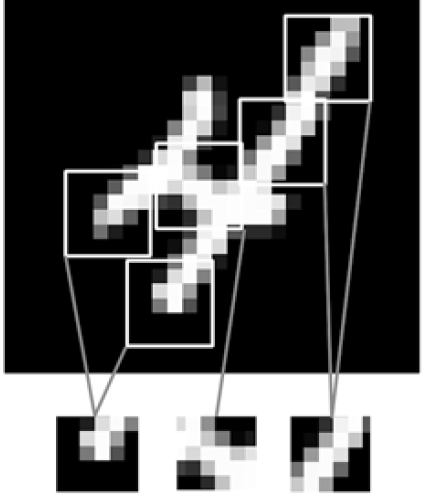

Image retrieved from [Chollet, Francois. Deep learning with Python](https://www.amazon.ca/Deep-Learning-Python-Francois-Chollet/dp/1617294438)

Moreover, densely connected layer breaks down for larger images because of the huge number of parameters it requires. CNNs solve this problem using partially connected layers and weight sharing.

**convnets** has two interesting properties:

* The patterns they learn are **translation invariant**. After learning a certain pattern in the left-side of a picture, a convnet can recognize it anywhere. **A densely connected network would have to learn the pattern anew if it appeared at a new location.** So, **convnets** can be efficient when processing images (because the visual world is fundamentally translation invariant).
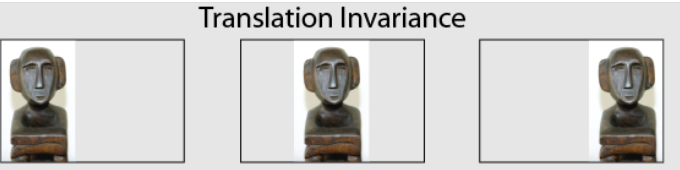


* It can learn **spatial hierarchies of patterns**. For example, first convolution layer can learn small local patterns (edges), while second convolution layer can learn larger patterns made of the features of the first layers. This process is repeated for more layers learning increasingly complex and abstract visual concepts. See Figure below:

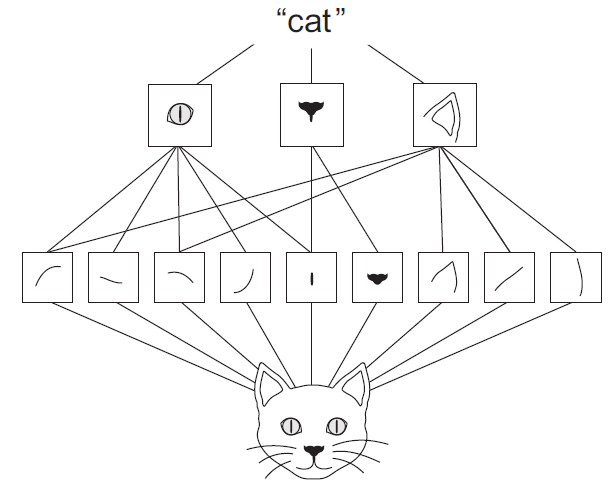
Image retrieved from [Chollet, Francois. Deep learning with Python](https://www.amazon.ca/Deep-Learning-Python-Francois-Chollet/dp/1617294438)

For image processing, first image should be digitized (convert to numbers). There are two spatial axes (**height and width**) as well as a **depth axis** (also called the channels axis). For an RGB image, the dimension of the depth axis is 3, because the image has three color channels: red, green, and blue. For a black-and-white picture, the depth is 1 (levels of gray). See the cat image below with dimension of (280, 300, 3):

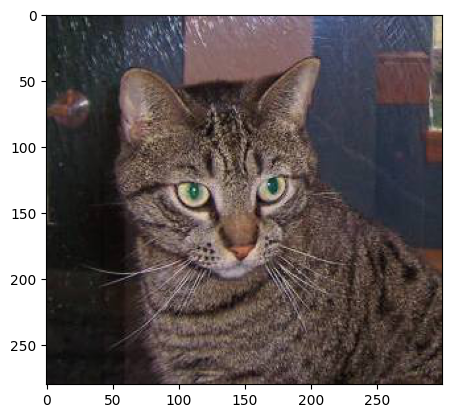

In [2]:
import warnings
warnings.filterwarnings('ignore')

data = plt.imread('./Data/train/cats/cat.1.jpg')
data_1 = data.copy() 
data_2 = data.copy() 
plt.imshow(data)
plt.show()

In [3]:
data.shape

(280, 300, 3)

We can modify image by changing the values for channel:

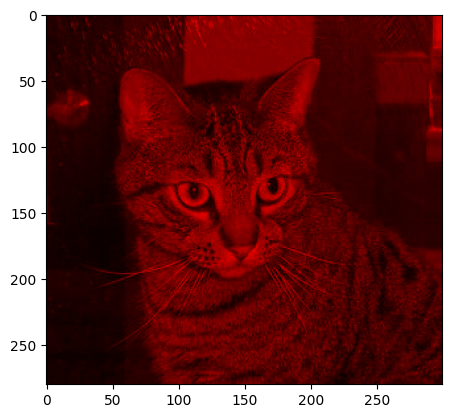

In [4]:
data_1[:, :, 1] = 0
data_1[:, :, 2] = 0
plt.imshow(data_1)
plt.show()

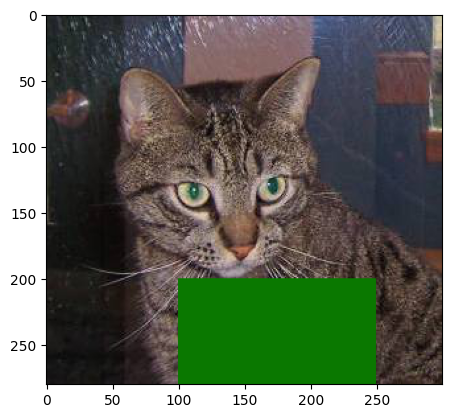

In [5]:
data_2[200:320, 100:250, :] = [10, 120, 0]
plt.imshow(data_2)
plt.show()

# Convolution

## One-dimensional 

In mathematics, convolution is a mathematical operation on two functions (f and g) that produces a third function ($f*g$) that expresses how the shape of one is modified by the other. The term convolution refers to both the result function and to the process of computing it. 


Here is a simple one dimension example for convolution:

In [6]:
array = np.array([1, 1, 0, 0, 2, 3, 1])
kernel = np.array([1, 0, 1])
conv = np.zeros(len(array)-1)

for ii in range(len(conv)-1):
    conv[ii] = (kernel * array[ii:ii+len(kernel)]).sum()
    print(f'sum({kernel}*{array[ii:ii+len(kernel)]})={conv[ii]}')
conv

sum([1 0 1]*[1 1 0])=1.0
sum([1 0 1]*[1 0 0])=1.0
sum([1 0 1]*[0 0 2])=2.0
sum([1 0 1]*[0 2 3])=3.0
sum([1 0 1]*[2 3 1])=3.0


array([1., 1., 2., 3., 3., 0.])

Figure below shows how convolution works in 1 dimension:
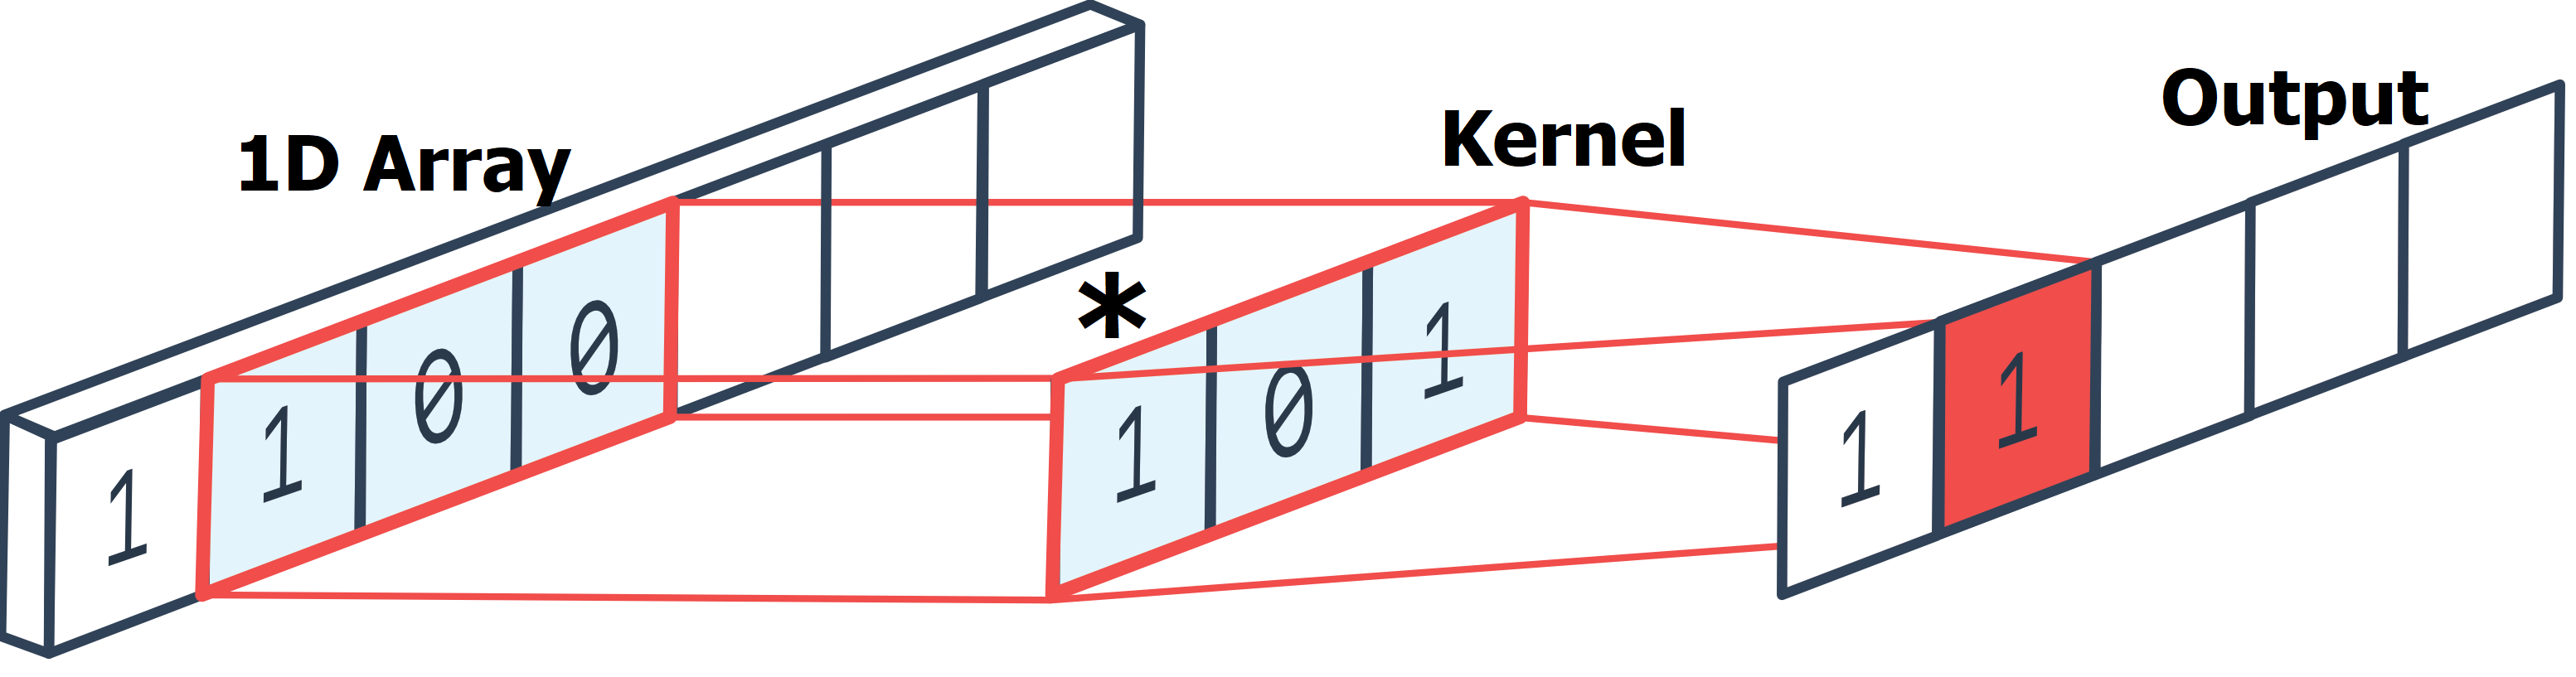

## Two-dimensional 

Example below shows a two dimensional convolution:

In [7]:
# Input Fetaure
df=pd.DataFrame()
df['col1']=[0,0,0,0,0,0]
df['col2']=[1,1,1,0,1,0]
df['col3']=[1,0,1,0,1,0]
df['col4']=[1,0,1,0,1,0]
df['col5']=[1,0,1,1,1,0]
df['col6']=[0,0,0,0,0,0]

# Kernel
df_k=pd.DataFrame()
df_k['col1']=[1, 0, 0]
df_k['col2']=[0, 1, 0]
df_k['col3']=[0, 0, 1]

In [8]:
kernel = df_k.to_numpy()
image=df.to_numpy()

conv = np.zeros((len(image)-2, len(image)-2))
for ii in range(len(conv)):
    for jj in range(len(conv)):
        window = image[ii:ii+len(kernel), jj:jj+len(kernel)]
        conv[ii, jj] = np.sum(window * kernel)

In [9]:
def drawmap(df,datafram=True,val=False, title='Input Feature'):
    """Plot digitized image and filters"""
    if datafram:
        array_val=df.to_numpy()
        nx=len(df.columns)
    else:
        array_val=val
        nx=len(val)
    ny=nx
    Var1a=np.zeros((ny,nx))+np.nan
    for i in range(nx):
        for j in range(ny):
            Var1a[j,i]=array_val[j,i]
        
    plt.title(title,fontsize=9)
    im = plt.imshow(array_val, cmap='summer',
                    origin='lower',aspect=1, interpolation='none')
    
    for (j, i), _ in np.ndenumerate(array_val):
        label = '{:0.0f}'.format(array_val[j,i])
        ax1.text(i,j,label,ha='center',va='center', fontsize=9.5)
        
    ax1.grid(linewidth='0.2')        
    plt.tick_params(left = False, right = False , labelleft = False ,
                    labelbottom = False, bottom = False)

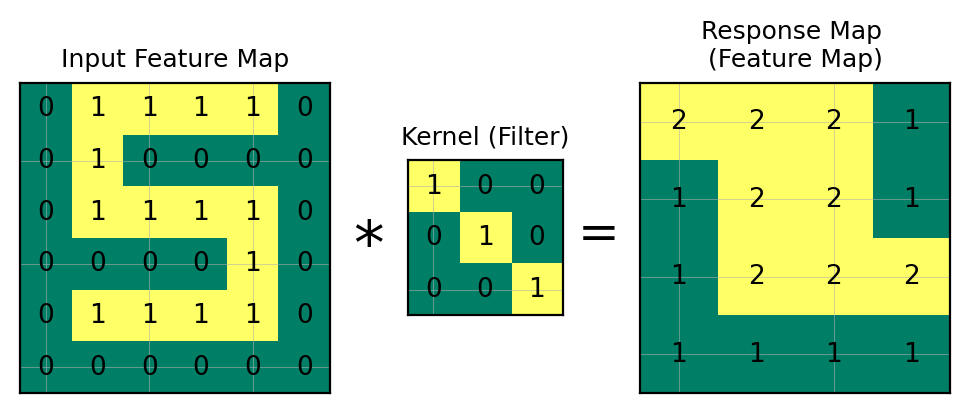

In [10]:
fig, ax1 = plt.subplots(figsize=(6,5), dpi= 200, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(1, 3, width_ratios=[2, 1,2], wspace=0.3)

ax1=plt.subplot(gs[0])
    
#ax1=plt.subplot(1,3,1)  
drawmap(df.iloc[::-1],title='Input Feature Map')
plt.text(5.95,2.,'*', 
         fontsize=22)
    
ax1=plt.subplot(gs[1])
drawmap(df_k.iloc[::-1],title='Kernel (Filter)')

plt.text(2.8,0.8,'=', 
         fontsize=18)

ax1=plt.subplot(gs[2])  
drawmap(df=False,datafram=False,val=conv[::-1],title='Response Map \n(Feature Map)')

Convolutions operate over 3D tensors, called **feature maps**, **with two spatial axes (height and width) as well as a depth axis (also called the channels axis)**. For an RGB image, the dimension of the depth axis is 3, because the image has three color channels: red, green, and blue. For a black-and-white picture, the depth is 1 (gray levels). The convolution operation extracts patches from its input feature map and applies the same transformation to all of these patches, producing an output feature map.

**Two key parameters for defining convolutions:**

* *Size of the patches extracted from the inputs*— These are typically 3 × 3 or 5 × 5. In the example above, they were 3 × 3, which is a common choice.

* *Depth of the output feature map*— The number of filters computed by the convolution. 

For Keras Conv2D layers, these parameters are the first arguments passed to the layer: **Conv2D(output_depth, (window_height, window_width))**.

# Understanding of Padding and Strides

Convolutional layer is the most important building block of a CNN. Neurons in the first convolutional layer are not connected to every single pixel in the input image, but only to pixels in their receptive fields. Each neuron of the second convolutional layer is only connected to neurons located within a small rectangle in the first layer. This allows the network to concentrate on small low-level features in the first hidden layer, then assemble them into larger higher-level features in the next hidden layer. This process is repeated for deeper layers.

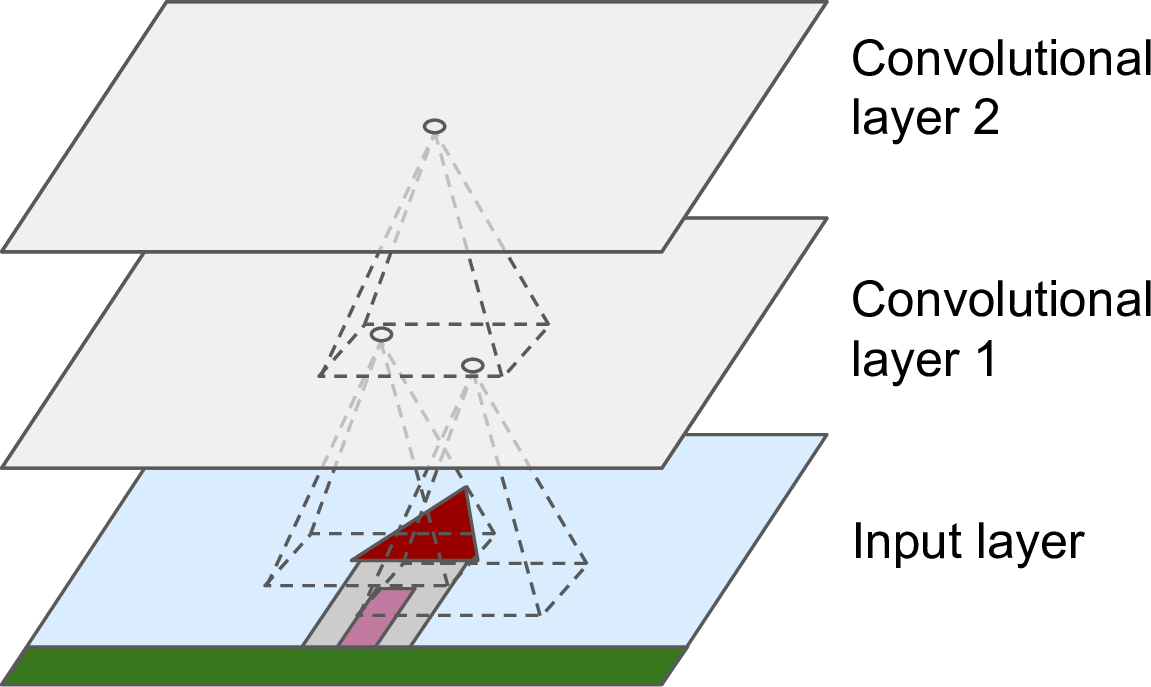

Image retrieved from [Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

Input image should be flatten before feeding them to neural network.

If we want to get an output feature map with the same spatial dimensions as the input, we can use padding. Padding adds an appropriate number of rows and columns on each side of the input feature map so as to make it possible to fit center convolution windows around every input tile. Figure below shows an example of *zero-padding* which adds one row to top and bottom and one row to left and right.
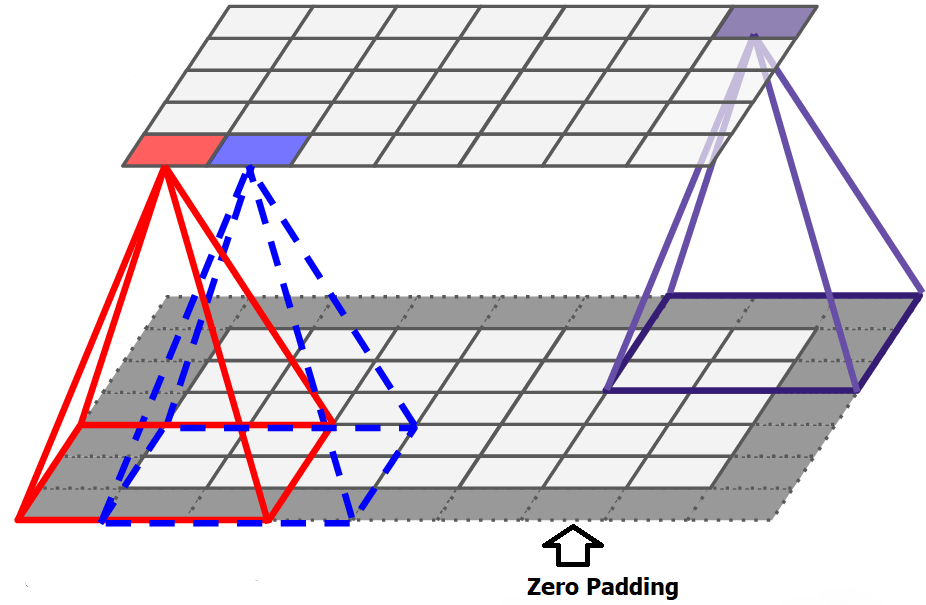
Image retrieved from [Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)    

In `Conv2D` layers, padding is configurable via the `padding` argument, which takes two values: **"valid"** means no padding; **"same"** means pad to have an output with the same width and height as the input. Defaults is "valid".

We can also connect a large input layer to a much smaller layer. So far We have assumed that the center tiles of the convolution windows are all contiguous. But the distance between two successive windows is a parameter of the
convolution, called its **stride**, which defaults to 1. Figure below shows how a 5 × 7 input layer (plus zero padding) is connected to a 3 × 4 layer, using 3 × 3 receptive fields and **a stride of 2**:

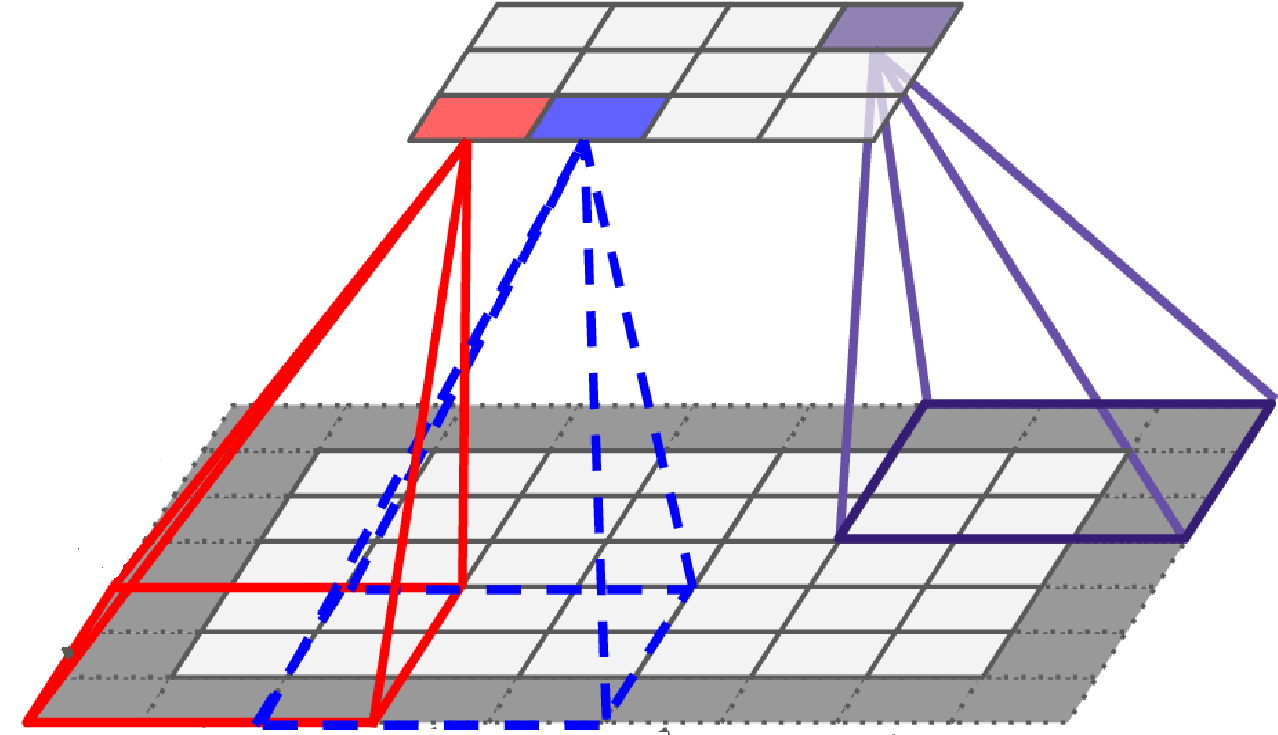
    
Image retrieved from [Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)      

# Stacking Multiple Feature Maps

Unlike what we have shown up to now, convolutional layer has multiple filters (we can decide how many), and it gives one feature map per filter, so it should be presented as 3D dimension. There is one neuron per pixel for each feature
map, and all neurons within a given feature map share the same parameters (i.e., the same weights and bias term). Neurons in different feature maps use different parameters. Convolutional layer simultaneously applies multiple trainable filters to its inputs, making it capable of detecting multiple features anywhere in its inputs. Figure below shows convolution layers with multiple feature maps and images with three color channel. Grayscale images have just one channel.

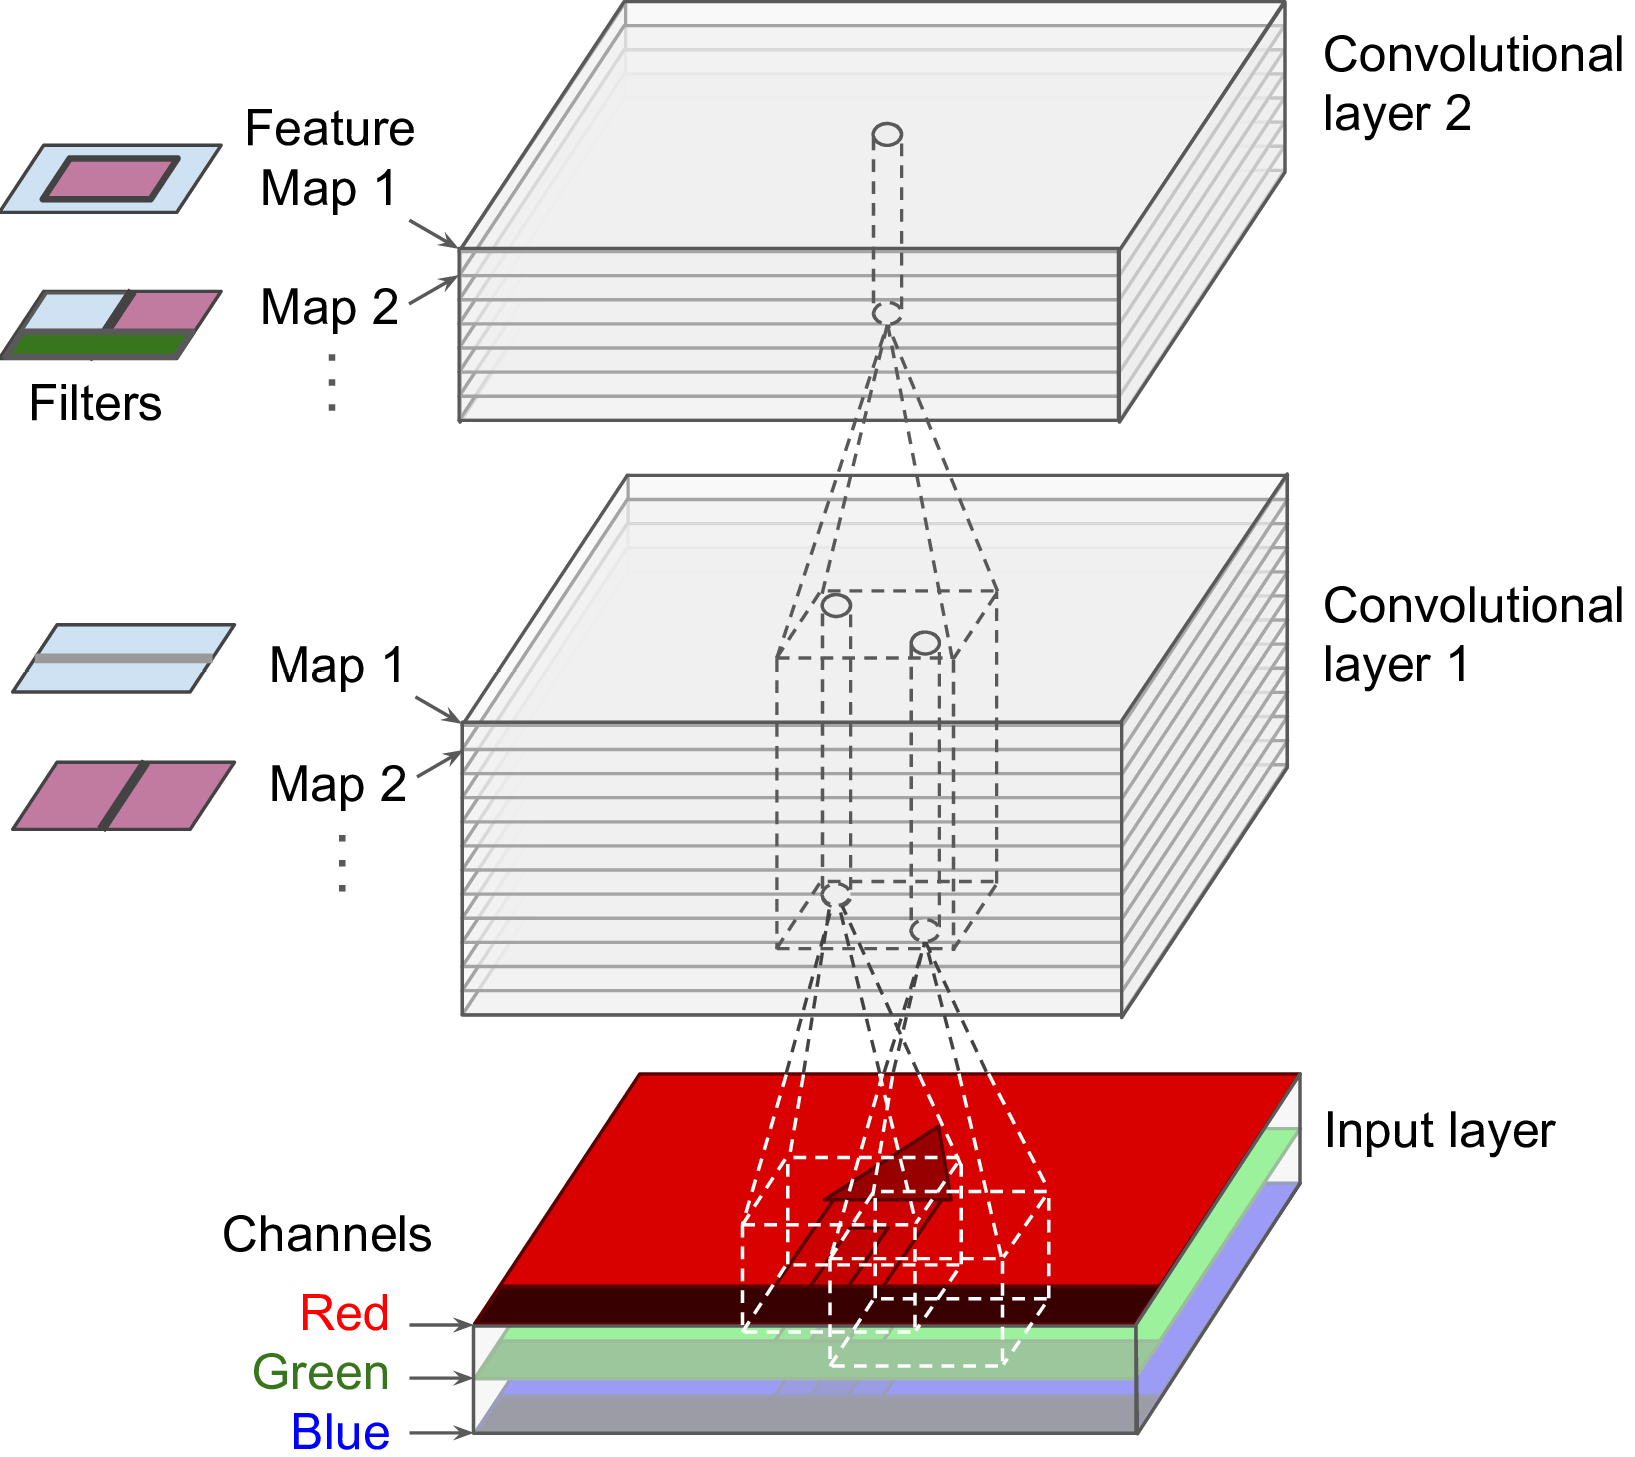
    
Image retrieved from [Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition](https://learning.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)    

Once the CNN has learned to recognize a pattern in one location, it can recognize it in any other location.

# Simple Tensorflow Implementation

Each input image in TensorFlow is typically represented as a 3D tensor of shape [height, width, channels]. A mini-batch is represented as a 4D tensor of shape [mini-batch size, height, width, channels].

The following code loads two sample images by `Scikit-Learn’s load_sample_images()`. The pixel should be scaled from 0 to 255 to 0 to 1. 

Then two 7 × 7 filters (one with a vertical white line in the middle, and the other with a horizontal white line in the
middle), and we apply them to both images using the `tf.nn.conv2d()` function,
which is part of TensorFlow’s low-level Deep Learning API. 

In this example, we use zero padding (padding="SAME") and a stride of 2. Finally, we plot one of the resulting
feature maps (similar to the top-right image in Figure 14-5).

In [11]:
# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

* "VALID" padding: convolutional layer does not use zero padding, ignore some rows and columns at the bottom and right of the input image, depending on the stride.


* "SAME" padding: convolutional layer uses zero padding. In this case, the number of output neurons is equal to the number of input neurons divided by the stride



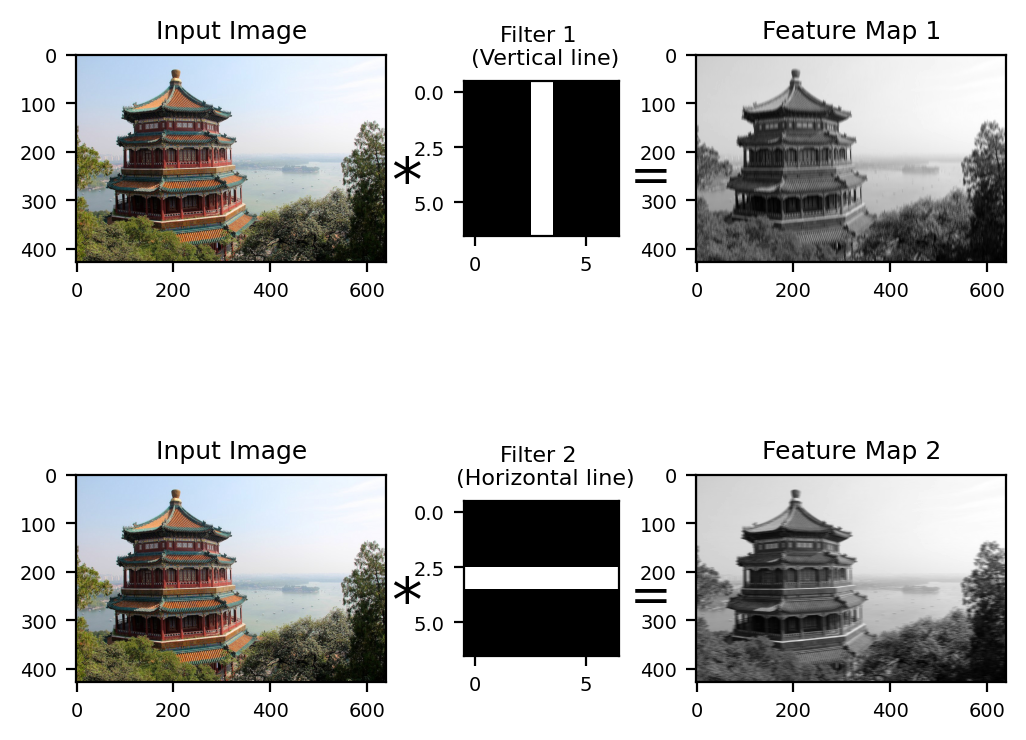

In [12]:
from matplotlib import gridspec
font = {'size'   : 7}
plt.rc('font', **font)

fig, ax1 = plt.subplots(figsize=(6,5), dpi= 200, facecolor='w', edgecolor='k')
gs = gridspec.GridSpec(2, 3, width_ratios=[2, 1,2], wspace=0.3)

ax1=plt.subplot(gs[0])
     
plt.imshow(china, cmap="gray") # plot 1st image's 2nd feature map
plt.title('Input Image',fontsize=9)
plt.text(650,300,'*', 
         fontsize=22)
    
ax1=plt.subplot(gs[1])
plt.imshow(filters[:, :, :, 0], cmap="gray") # plot 1st image's 2nd feature map
plt.title('Filter 1 \n (Vertical line)',fontsize=8)
plt.text(7,4.5,'=', fontsize=18)

ax1=plt.subplot(gs[2])  
plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 2nd feature map
plt.title('Feature Map 1',fontsize=9)


ax1=plt.subplot(gs[3])
     
plt.imshow(china, cmap="jet") # plot 1st image's 2nd feature map
plt.title('Input Image',fontsize=9)
plt.text(650,300,'*', 
         fontsize=22)
    
ax1=plt.subplot(gs[4])
plt.imshow(filters[:, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.title('Filter 2 \n (Horizontal line)',fontsize=8)
plt.text(7,4.5,'=', fontsize=18)

ax1=plt.subplot(gs[5])  
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.title('Feature Map 2',fontsize=9)

plt.show()

Let's zoom in on Feature Map 1 and 2 to clearly see the differences:

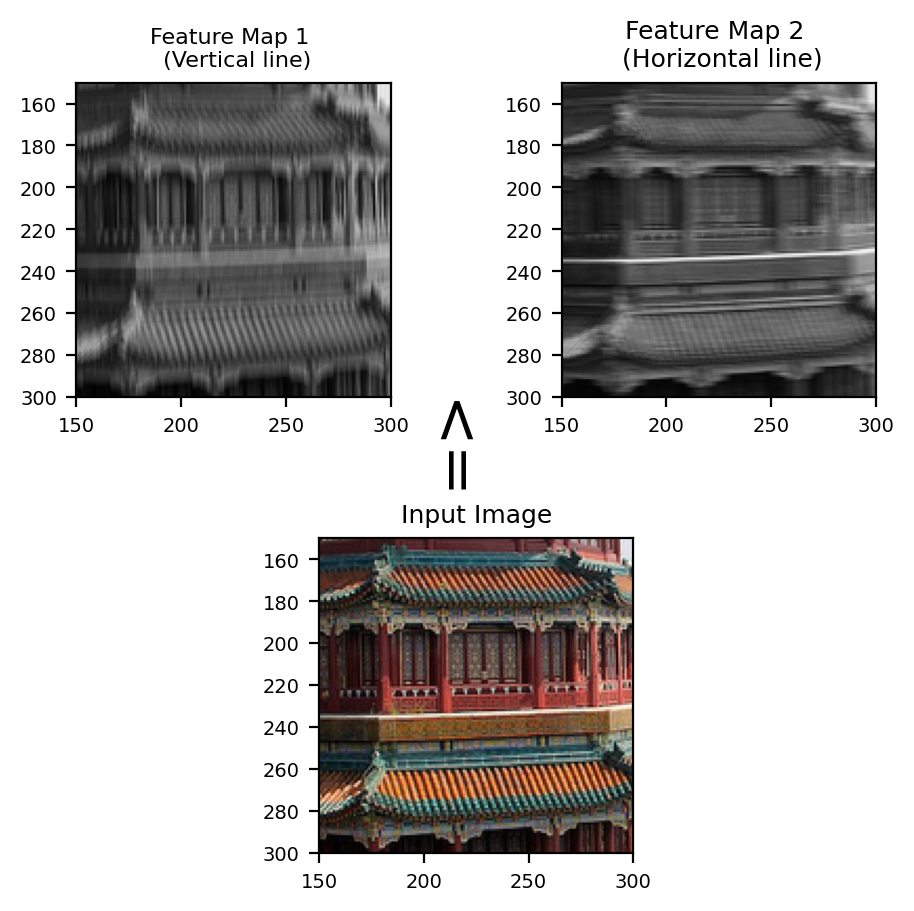

In [13]:
font = {'size'   : 7}
plt.rc('font', **font)

fig, ax1 = plt.subplots(figsize=(6,5), dpi= 200, facecolor='w', edgecolor='k')
#gs = gridspec.GridSpec(2, 3, width_ratios=[2, 1,2], wspace=0.3)

gs = gridspec.GridSpec(2, 4)
ax1=plt.subplot(gs[0, :2], ) 
plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 2nd feature map
plt.title('Feature Map 1 \n (Vertical line)',fontsize=8)
plt.xlim((150,300))
plt.ylim((300,150))


ax2=plt.subplot(gs[0, 2:]) 
plt.imshow(outputs[0, :, :, 1], cmap="gray") # plot 1st image's 2nd feature map
plt.title('Feature Map 2 \n (Horizontal line)',fontsize=9)
plt.xlim((150,300))
plt.ylim((300,150))

ax3=plt.subplot(gs[1, 1:3])
     
plt.imshow(china, cmap="gray") # plot 1st image's 2nd feature map
plt.title('Input Image',fontsize=9)
plt.xlim((150,300))
plt.ylim((300,150))

plt.text(200,120,'=>', 
         fontsize=22,rotation=90)

plt.subplots_adjust(hspace=0.45)

plt.show()

Up to now, we manually defined the filters, but in a real CNN filters are defined as trainable variables, in order to enable the neural net to learn which filters work best. Instead of manually creating the variables, we can use `keras.layers.Conv2D` layer:

In [14]:
conv = keras.layers.Conv2D(filters=50, kernel_size=5, strides=1,padding="SAME", activation="relu")

This code creates a Conv2D layer with 50 filters, each 5 × 5, using a stride of 1 (both horizontally and vertically), SAME padding, and applying the ReLU activation function to its outputs.

Size of the output feature map is calculated as below:

$\LARGE O=\frac{I-K+2P}{S}+1$

where
*I* = size of the input image

*K* = size of the kernel

*P* = size of the zero padding

*S* = strides

# Pooling Layer

Another problem with CNNs is huge RAM is required for convolutional layers. This problem is worse during training because of the reverse pass of backpropagation. 

Consider a convolutional layer with 5 × 5 filters, outputting 200 feature maps of size 150 × 100, with stride 1 and SAME padding. If the input is a 150 × 100 RGB image (three channels), then the number of parameters is (5 × 5 × 3 + 1) × 200
= 15,200 (the +1 corresponds to the bias terms). Each of the 200 feature maps contains 150 × 100 neurons, and each of these neurons needs to compute a weighted sum of its 5 × 5 × 3 =75 inputs: that’s a total of 225 million float multiplications. This is quite computationally intensive. 

Pooling is a technique to reduce number of parameters for lower the computational load and memory usage; it consists of extracting windows from the input feature maps and outputting the max/mean value of each channel. Pooling is usually done with 2 × 2 windows and stride 2, in order to downsample the feature maps by a factor of 2.


Each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer within a small rectangular receptive field. We must define its size, the stride, and the padding type but pooling layer does not have weight.

Pooling can be done for any aggregation, however maximum pooling is commonly used because it introduces some level of *invariance* to small translations. Mean pooling leads to more information loss than max pooling. Moreover, max pooling preserves only the strongest feature and more powerful translation invariance than mean pooling. 

Pooling can also be destructive because dropping significant percentage of input values.



Figure below shows a schematic illustration of max pooling:

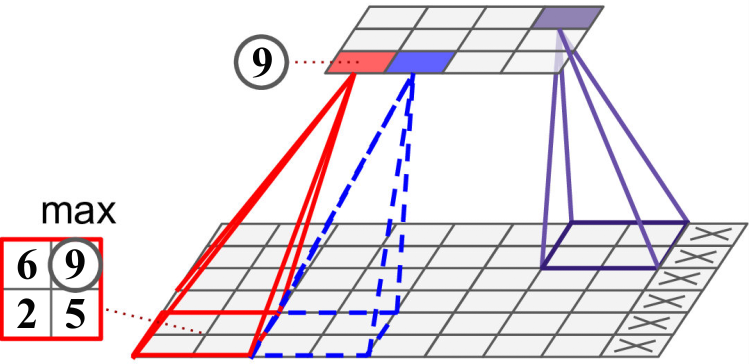

Max pooling layer in TensorFlow is implemented for 2 × 2 kernel as below:

`max_pool = keras.layers.MaxPool2D(pool_size=2)`

The strides default to the kernel size, so this layer will use a stride of 2 (both horizontally and vertically). By default, it uses `VALID` padding (i.e., no padding at all).

Figure below shows applying convolution on image that is digit 9 convolved by a 3*3 filter, then applying ReLu activation function followed by Max pooling: 
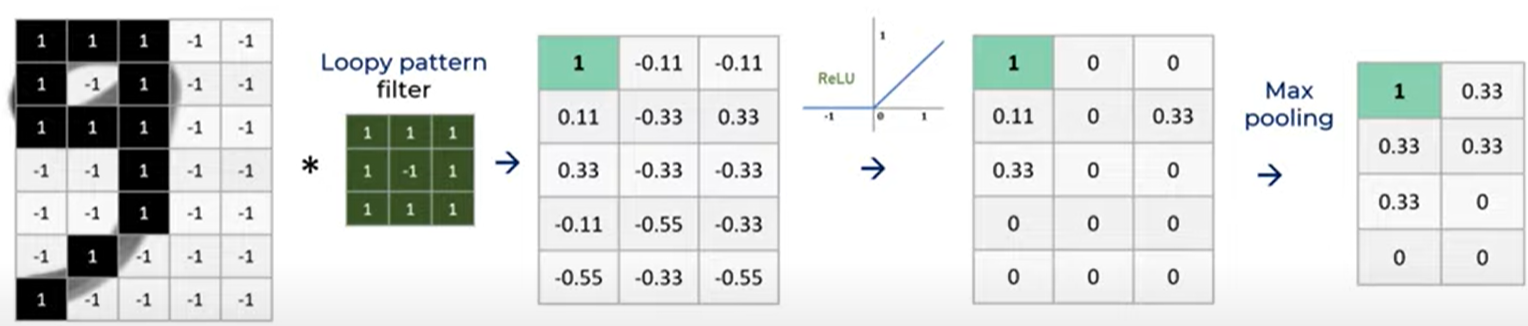

# Architectures of CNN

Typical CNN architectures stack convolutional layers (each followed by a ReLU layer), then a pooling layer, another few convolutional layers (+ReLU) next, followed by another pooling layer. This process can be repeated. See Figure below a:


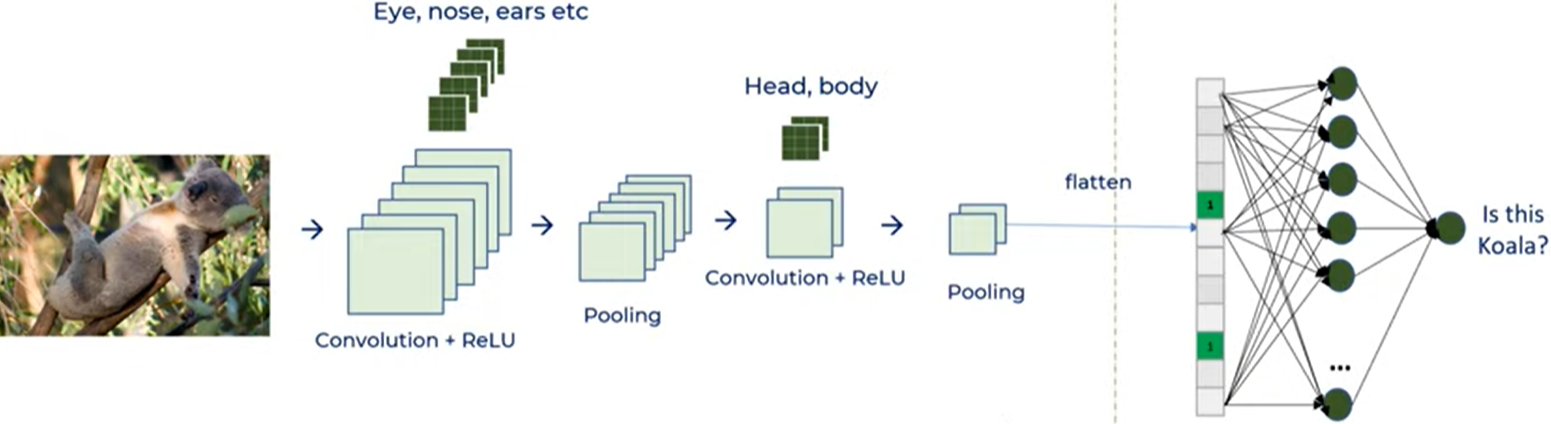


As image progresses through the network, it gets smaller and smaller. At the top of the stack, a regular feedforward neural network is added, composed of a few fully connected layers (+ReLUs), and the final layer outputs the prediction. Figure below shows how to Flatten a 3x3 image matrix into a 9x1 vector:

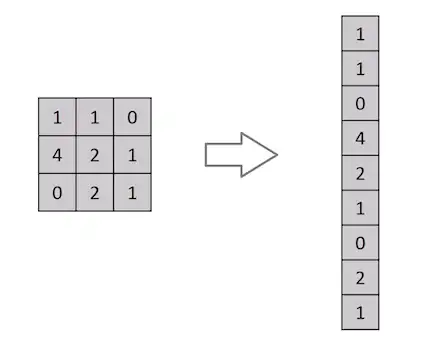


**Typically networks gets deeper and deeper (with more feature maps) as progress through network.**

Convolution kernels should not be taken too large. For example, it is generally preferable to stack two layers with 3 × 3 kernels instead of instead of 5 × 5 kernel due to less parameters and requiring less computations, and usually perform better. 

However, it is recommended the first convolutional layer have a large kernel (e.g., 5 × 5) usually with stride of 2 or more: this will reduce the spatial dimension of the image without losing too much information, and since the input image only has 3 channels in general, it will not be too costly.

In [15]:
DefaultConv2D = partial(keras.layers.Conv2D, kernel_size=3, activation='relu', padding="SAME")

model = keras.models.Sequential([
      DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
      keras.layers.MaxPooling2D(pool_size=2),
      DefaultConv2D(filters=128),
      DefaultConv2D(filters=128),
      keras.layers.MaxPooling2D(pool_size=2),
      DefaultConv2D(filters=256),
      DefaultConv2D(filters=256),
      keras.layers.MaxPooling2D(pool_size=2),
      keras.layers.Flatten(),
      keras.layers.Dense(units=128, activation='relu'),
      keras.layers.Dense(units=64, activation='relu'),
      keras.layers.Dense(units=10, activation='softmax'),
    ])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 7, 7, 256)         2

# Train CNN from Scratch (Cat and Dog Images)

In this section, a CNN is trained for classifying images as dogs or cats, in a dataset with 2,000 cats and 2,000 dogs images. 2,000 pictures are used for training, 1,000 for validation, and 1,000 for testing.

The Dogs vs. Cats are available by Kaggle as part of a computer-vision competition in late 2013. You can download the original dataset from [kaggle](www.kaggle.com/c/dogs-vs-cats/data) (you need to create a Kaggle account).

The pictures are medium-resolution color JPEGs. Unsurprisingly, the dogs-versus-cats Kaggle competition in 2013 was won by entrants who used `convnets`. The best entries achieved up to 95% accuracy. In this example, you’ll get fairly close to this accuracy.

In [17]:
base_dir = './Data' # Directory dataset
#os.mkdir(base_dir)

In [18]:
# Directories for the training, validation, and test splits
train_dir = os.path.join(base_dir, 'train')   
#os.mkdir(train_dir)   
validation_dir = os.path.join(base_dir, 'validation') 
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test') 
#os.mkdir(test_dir)   

In [19]:
train_cats_dir = os.path.join(train_dir, 'cats')  # Directory with training cat pictures
#os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')  # Directory with training dog pictures
#os.mkdir(train_dogs_dir)

In [20]:
validation_cats_dir = os.path.join(validation_dir, 'cats')  # Directory with validation cat pictures
#os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # Directory with validation dog pictures
#os.mkdir(validation_dogs_dir)

In [21]:
test_cats_dir = os.path.join(test_dir, 'cats')  # Directory with test cat pictures
#os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')  # Directory with test dog pictures
#os.mkdir(test_dogs_dir)

In [22]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [23]:
f'{train_cats_dir}\\cat.0.jpg'

'./Data\\train\\cats\\cat.0.jpg'

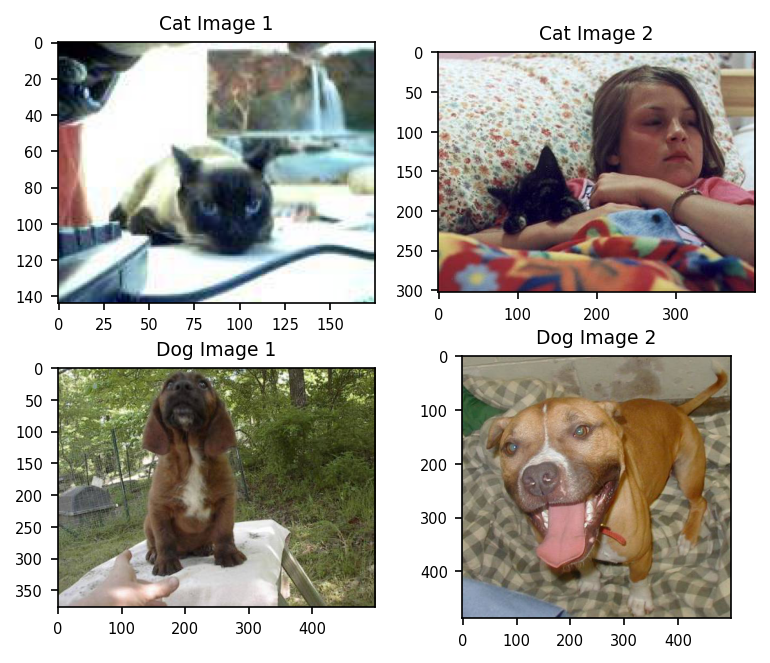

In [24]:
font = {'size'   : 7}
plt.rc('font', **font)

fig, ax1 = plt.subplots(figsize=(6,5), dpi= 150, facecolor='w', edgecolor='k')

ax=plt.subplot(2,2,1)
image = plt.imread(f'{train_cats_dir}\\cat.5.jpg')
plt.title('Cat Image 1',fontsize=9)
plt.imshow(image, cmap="jet")   
#    
ax=plt.subplot(2,2,2)
image = plt.imread(f'{train_cats_dir}\\cat.6.jpg')
plt.title('Cat Image 2',fontsize=9)
plt.imshow(image, cmap="jet")   
#
ax=plt.subplot(2,2,3)
image = plt.imread(f'{train_dogs_dir}\\dog.5.jpg')
plt.title('Dog Image 1',fontsize=9)
plt.imshow(image, cmap="jet")   
#
ax=plt.subplot(2,2,4)
image = plt.imread(f'{train_dogs_dir}\\dog.6.jpg')
plt.title('Dog Image 2',fontsize=9)
plt.imshow(image, cmap="jet")   
plt.show()

## Data Preprocessing  

Data should be formatted into appropriately preprocessed floatingpoint tensors before feding into the network. So the steps below should be applied for JPEG files:
    
* Reading the JPEG files.


* Decoding the JPEG content to RGB grids of pixels.


* Convert these into floating-point tensors.


* Rescaling the pixel values (between 0 and 255) to the [0, 1] interval.

Keras has a module with image-processing helper tools  called `keras.preprocessing.image`. It also contains the class `ImageDataGenerator`, which you can automatically turn image files on disk into batches of preprocessed tensors. 

In [25]:
# Rescales all images by 1/255
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [26]:
# Resizes training images to 150 × 150
train_generator = train_datagen.flow_from_directory(train_dir,batch_size=2000,target_size=(150, 150),class_mode='binary')

Found 2000 images belonging to 2 classes.


In [27]:
# Resizes validation images to 150 × 150
validation_generator = test_datagen.flow_from_directory(test_dir,batch_size=1000,target_size=(150, 150),
                                                        class_mode='binary')

Found 1000 images belonging to 2 classes.


## Implement CNN

In [28]:
keras.backend.clear_session() # Clear previous model

model = tf.keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=7, activation='relu',
input_shape=(150, 150, 3), padding="Valid"))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(units=512, activation='relu'))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 144, 144, 32)      4736      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 72, 72, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 70, 70, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 35, 35, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 33, 33, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [30]:
from keras import optimizers
# Configuring the model for training
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

In [31]:
for data_train, labels_train in train_generator:
    print('data train shape:', data_train.shape)
    print('labels train shape:', labels_train.shape)
    break
#    
for data_validation, labels_validation in validation_generator:
    print('data validation shape:', data_validation.shape)
    print('labels validation shape:', labels_validation.shape)
    break

data train shape: (2000, 150, 150, 3)
labels train shape: (2000,)
data validation shape: (1000, 150, 150, 3)
labels validation shape: (1000,)


In [32]:
# Early stopping to avoid overfitting
monitor= keras.callbacks.EarlyStopping(min_delta=1e-6,patience=6)    
history = model.fit(data_train, labels_train,batch_size=32, validation_data=[data_validation, labels_validation],
                    callbacks=[monitor],verbose=0,epochs=50)

In [33]:
def plot(history):

    font = {'size'   : 10}
    plt.rc('font', **font)
    fig, ax=plt.subplots(figsize=(12, 4), dpi= 110, facecolor='w', edgecolor='k')
    
    ax1 = plt.subplot(1,2,1)
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, 'ro', label='Training loss')          
    plt.plot(epochs, val_loss_values, 'r', label='Validation loss',linewidth=2)    
    plt.title('Training and Validation Loss',fontsize=14)
    plt.xlabel('Epochs (Early Stopping)',fontsize=12)
    plt.ylabel('Loss',fontsize=11)
    plt.xticks( epochs)
    plt.legend(fontsize='12')
    plt.ylim((0, 1))
    
    ax2 = plt.subplot(1,2,2)    
    history_dict = history.history
    loss_values = history_dict['acc']
    val_loss_values = history_dict['val_acc']
    epochs = range(1, len(loss_values) + 1)
    ax2.plot(epochs, loss_values, 'bo', label='Training accuracy')          
    ax2.plot(epochs, val_loss_values, 'b', label='Validation accuracy',linewidth=2)    
    plt.title('Training and Validation Accuracy',fontsize=14)
    plt.xlabel('Epochs (Early Stopping)',fontsize=12)
    plt.ylabel('Accuracy',fontsize=12)
    plt.legend(fontsize='12')
    plt.xticks( epochs)
    plt.ylim((0, 1))
    plt.show()

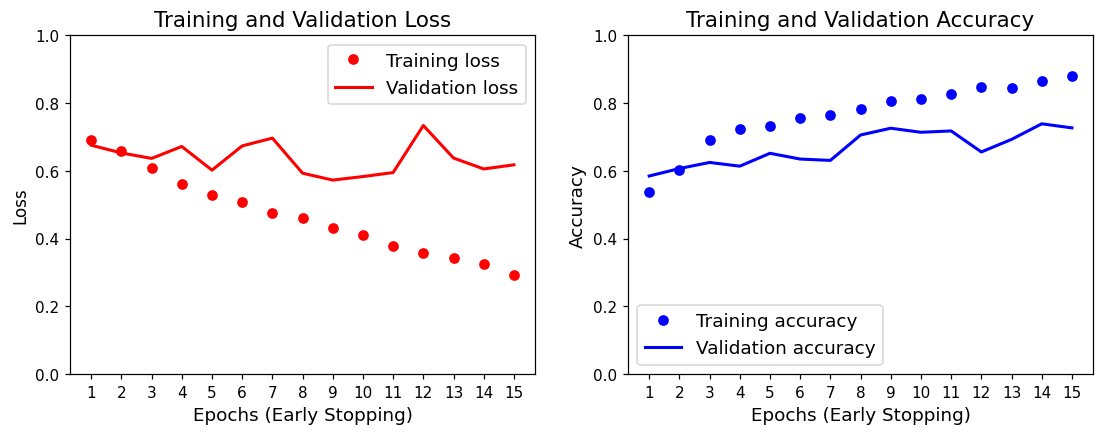

In [34]:
plot(history)

## Data Augmentation

Overfitting can happen when there are too few samples to learn from. Data augmentation is the addition of new data artificially derived from existing training data. Techniques include resizing, flipping, rotating, cropping, padding, etc. It makes the model robust with better performance by exposing the model to more aspects of the data and generalize better.

In [35]:
# Apply data 
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=40,width_shift_range=0.2,
                             height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                             horizontal_flip=True,fill_mode='nearest')

* **rotation_range**: value in degrees (0–180), a range within which to randomly rotate pictures.


* **width_shift** and **height_shift**: ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.


* **shear_range**: randomly applying shearing transformations.


* **zoom_range**: randomly zooming inside pictures.


* **horizontal_flip**: randomly flipping half the images horizontally.


* **fill_mode**: filling in newly created pixels appeared after a rotation or a width/height shift.

Figure below shows a randomly selected image to apply augmentation:

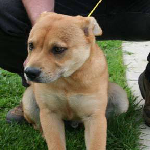

In [36]:
fnames = [os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir)]
img_path = fnames[20]   # Chooses one image to augment
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150, 150))    # Reads the image and resizes it
img

See 4 augmented images below:

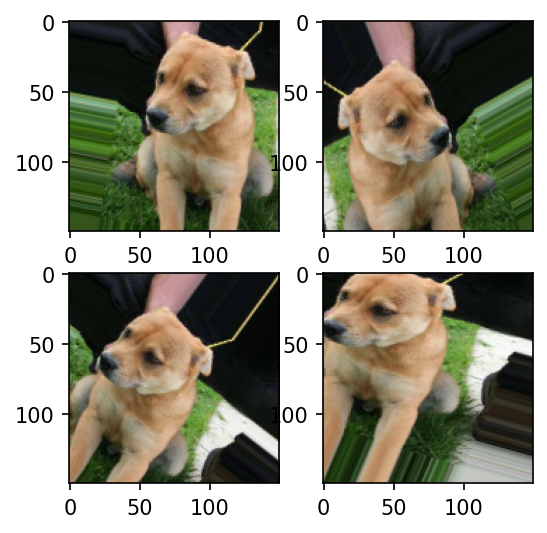

In [37]:
x = tf.keras.preprocessing.image.img_to_array(img)  # Converts it to a Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)                       # Reshapes it to (1, 150, 150, 3)
i = 0
fig = plt.subplots(figsize=(4, 4), dpi= 150, facecolor='w', edgecolor='k')

for batch in datagen.flow(x, batch_size=1):
    ax=plt.subplot(2,2,i+1)
    imgplot = plt.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

### Implement a new CNN with Augmentation

In [38]:
# Implement Augmentation
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,rotation_range=40,
                                                                width_shift_range=0.2,height_shift_range=0.2,
                                                                shear_range=0.2,zoom_range=0.2,horizontal_flip=True,)
#
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255) 
#
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),  # Resizes all images to 150 × 150
                                    batch_size=2000,class_mode='binary')
#
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                    target_size=(150, 150),batch_size=1000,class_mode='binary')
#
for data_train_A, labels_train_A in train_generator:
    print('Augmented data train shape:', data_train_A.shape)
    print('Augmented labels train shape:', labels_train_A.shape)
    break
#    
for data_validation, labels_validation in validation_generator:
    print('data validation shape:', data_validation.shape)
    print('labels validation shape:', labels_validation.shape)
    break

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Augmented data train shape: (2000, 150, 150, 3)
Augmented labels train shape: (2000,)
data validation shape: (1000, 150, 150, 3)
labels validation shape: (1000,)


In [39]:
# Merge raw data with augmented data
data_train_I_A=np.concatenate((data_train_A,data_train), axis=0)
labels_train_I_A=np.concatenate((labels_train_A,labels_train), axis=0)

Figure below show an example of augmented figure:

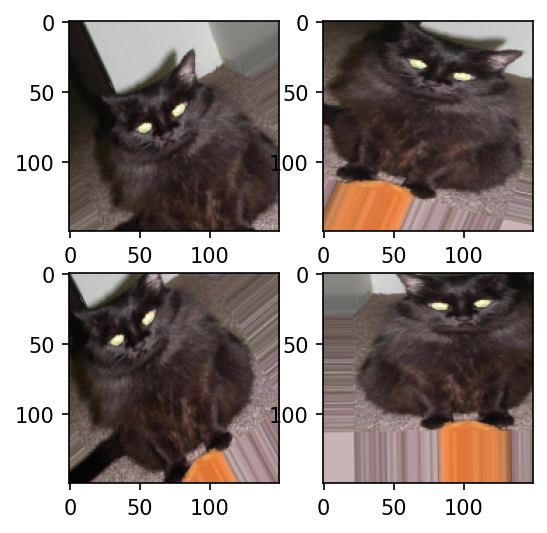

In [40]:
x = data_train[5]
x = x.reshape((1,) + x.shape)
i = 0
fig = plt.subplots(figsize=(4, 4), dpi= 150, facecolor='w', edgecolor='k')
for batch in datagen.flow(x, batch_size=1):
    ax=plt.subplot(2,2,i+1)
    imgplot = plt.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

In [41]:
# Configuring the model for training
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4), 
              metrics=['acc'])

# Early stopping to avoid overfitting
monitor= tf.keras.callbacks.EarlyStopping(min_delta=1e-5,patience=5)    
history = model.fit(data_train_I_A, labels_train_I_A, batch_size=64, validation_data=(data_validation, labels_validation),
                    callbacks=[monitor],verbose=0,epochs=50)

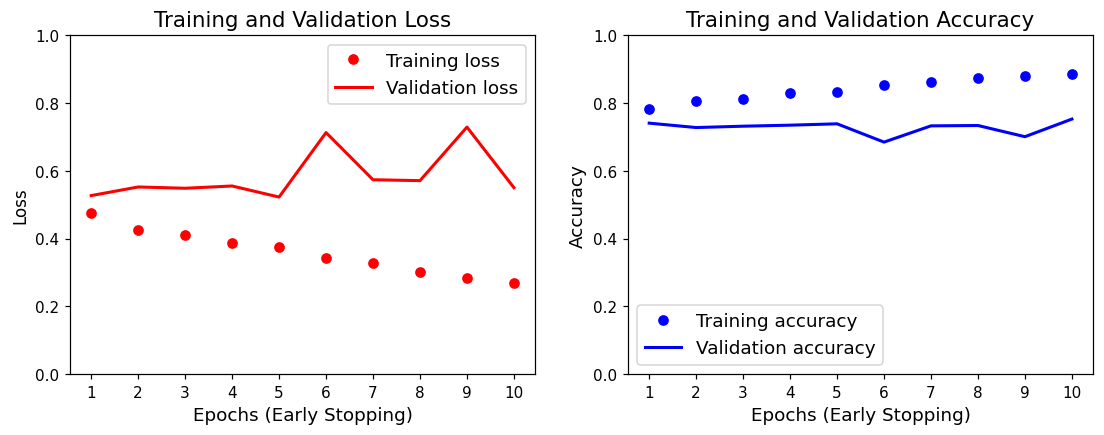

In [42]:
plot(history)

# Pretrained Model

Over the years, fundamental architecture for CNN have been developed, leading to amazing advances in the field. A good measure of this progress is the error rate in competitions such as the ILSVRC [ImageNet challenge](https://image-net.org/). Classical CNN architecture is **LeNet-5** architecture (1998), and three of the winners of the ILSVRC challenge are, **AlexNet (2012)**, **GoogLeNet (2014)** and **ResNet (2015)**.

The most widely known CNN architecture is [LeNet-5 architecture](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf) created by Yann LeCun in 1998 for handwritten digit recognition (MNIST). The Table below shows LeNet-5 architecture:


|  **<span class="mark">Layer**  |  **<span class="mark">Type** |  **<span class="mark">Maps</span>** |  **<span class="mark">Size</span>** |  **<span class="mark">Kernel size</span>** | **<span class="mark">Stride</span>** | **<span class="mark">Activation</span></span></span>** |
|      ---    |  ---     | ---    |  ---      |  ---     | ---    |  ---     | 
|Out| Fully Connected |  –   |  10      |  –     |–    |RBF
|F6 | Fully Connected |  –   |  84      |  –     |–    |tanh
|C5 | Convolution     |  120 |  1 × 1   |  5 × 5 |1    |tanh
|S4 | Avg Pooling     |  16  |  5 × 5   |  2 × 2 |2    |tanh
|C3 | Convolution     |  16  |  10 × 10 |  5 × 5 |1    |tanh
|S2 | Avg Pooling     |  6   |  14 × 14 |  2 × 2 |2    |tanh
|C1 | Convolution     |  6   |  28 × 28 |  5 × 5 |1    |tanh
|In | Input           |  1   |  32 × 32 |  –     |–    | –

The MNIST images have 28 × 28 pixels, but LeNet-5 use zero-padded that increase the input pixels to 32 × 32 pixels. The images should be normalized before feeding to the network. 

In general, we do not have to implement standard models like GoogLeNet or ResNet manually, because we can get pretrained networks with a single line of code from keras.applications package. For example, the code below creates a ResNet-50 model and download weights pretrained on the ImageNet dataset. 

In [43]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

In [44]:
help(keras.applications)

Help on package keras.api._v2.keras.applications in keras.api._v2.keras:

NAME
    keras.api._v2.keras.applications - Keras Applications are premade architectures with pre-trained weights.

PACKAGE CONTENTS
    convnext (package)
    densenet (package)
    efficientnet (package)
    efficientnet_v2 (package)
    imagenet_utils (package)
    inception_resnet_v2 (package)
    inception_v3 (package)
    mobilenet (package)
    mobilenet_v2 (package)
    mobilenet_v3 (package)
    nasnet (package)
    regnet (package)
    resnet (package)
    resnet50 (package)
    resnet_rs (package)
    resnet_v2 (package)
    vgg16 (package)
    vgg19 (package)
    xception (package)

FILE
    c:\users\mehdirezvandehy\anaconda3\lib\site-packages\keras\api\_v2\keras\applications\__init__.py




To apply it, we should use right image size. A ResNet-50 model requires 224 × 224 images while other models may expect other sizes, such as 299 × 299. We can use `TensorFlow’s tf.image.resize()` function to resize the images:

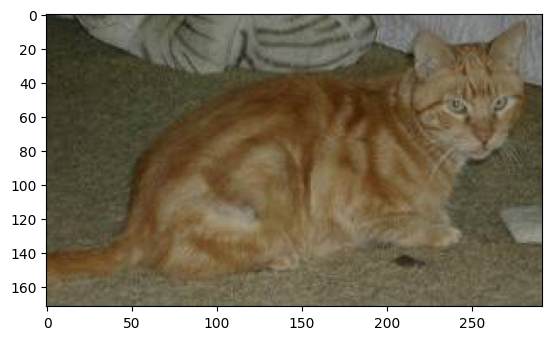

In [45]:
# Load cat image
data = plt.imread('./Data/train/cats/cat.600.jpg')
plt.imshow(data)
plt.show()

# resize it to 224 × 224 compatible with ResNet50
images_resized = tf.image.resize(data, [224, 224])

The aspect ratio is not preserved by `tf.image.resize()`. If we want to resolve this, we can try cropping the images to the appropriate aspect ratio before resizing. Both operations can be done in one shot with `tf.image.crop_and_resize()`.

All pretrained models assume that the images in a specific way are preprocessed: 0 to 1, or -1 to 1, and so on. `preprocess_input()` function is provided by each image to preprocess images. 

These functions assume that the pixel values range from 0 to 255:

In [46]:
inputs = keras.applications.resnet50.preprocess_input(images_resized)

In [47]:
Y_proba = model.predict(np.array(inputs).reshape(1,224, 224, 3))

1/1 [==============================] - 1s 778ms/step


In [48]:
top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for idx in range(1):
    print(f"Image #{idx}")
    for cls_id, name, y_proba in top_K[idx]:
        print(f" {cls_id} - {name}= {int(y_proba * 100)}%")
    print()

Image #0
 n02123159 - tiger_cat= 60%
 n02123045 - tabby= 28%
 n04265275 - space_heater= 1%



As can be seen, pretrained model can predict tiger cat with 60% probability.